In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.append('..')
from lib import *

In [11]:
L = 9
q = naminoacids

In [17]:
df = pd.read_csv('data/entropies.csv', index_col=0)
df.head()

,S,E,F,Ehuman
name,,,,
Human,25.853997,-2.590162,-28.444159,-2.590162
Malaria,24.456549,-5.282235,-29.738784,-2.088056
Chagas,25.629811,-2.977678,-28.607489,-2.562489
Tuberculosis,24.926774,-4.600918,-29.527692,-2.779992
Ecoli,25.818570,-2.805620,-28.624189,-2.277082


In [22]:
Fhuman = df.loc['Human']["F"]

In [29]:
df['DKL'] = df['Ehuman']-df['E'] + df['F'] - Fhuman
df['DKL_rand'] = np.log(q)*L-df['S']

In [30]:
nats_to_bits = np.log2(np.exp(1))

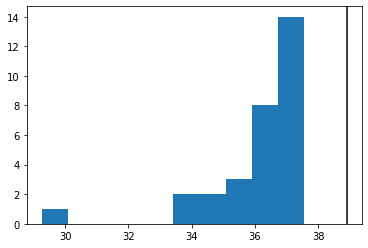

In [31]:
plt.hist(df['S']*nats_to_bits)
plt.axvline(np.log2(q)*L, color='k')

In [32]:
df.sort_values('S')

,S,E,F,Ehuman,DKL,DKL_rand
name,,,,,,
HBV,20.290374,-5.595645,-25.886019,-2.412454,5.741331,6.671217
HCV,23.543850,-4.021414,-27.565264,-2.394171,2.506137,3.417740
HIV,23.565330,-3.406392,-26.971722,-2.101879,2.776949,3.396261
InfluenzaA,23.943078,-3.242337,-27.185416,-1.992319,2.508762,3.018512
DENV,24.066164,-3.276689,-27.342853,-1.953459,2.424536,2.895427
InfluenzaB,24.403003,-3.243520,-27.646523,-2.059277,1.981878,2.558587
Malaria,24.456549,-5.282235,-29.738784,-2.088056,1.899554,2.505042
Ebola,24.530203,-3.211622,-27.741825,-2.166519,1.747436,2.431387
HSV1,24.893040,-4.357561,-29.250601,-2.804701,0.746418,2.068550


(array([14.,  8.,  0.,  3.,  4.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.57413309, 1.14826618, 1.72239927, 2.29653235,
        2.87066544, 3.44479853, 4.01893162, 4.59306471, 5.1671978 ,
        5.74133089]),
 <a list of 10 Patch objects>)

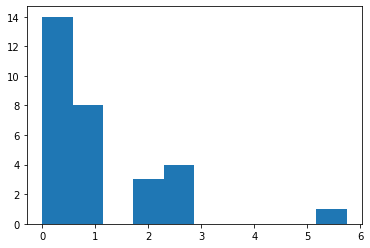

In [27]:
plt.hist(df['DKL'])

In [49]:
names = ['Human', 'Mouse', 'Vaccinia', 'InfluenzaB', 'InfluenzaA', 'CMV', 'HCV', 'HSV1',
       'DENV', 'HIV', 'EBV', 'Ebola', 'Ecoli', 'Tuberculosis', 'Listeria',
       'Burkholderia', 'Meningococcus', 'StrepA', 'Hpylori',
       'Lyme', 'Tetanus', 'Leprosy', 'Malaria', 'Chagas']

colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']
type_to_color = {'virus' : colors[0],
                 'bacterium' : colors[1],
                 'parasite' : colors[2],
                 'vertebrate' : colors[3],
                 'uniform' : colors[4]
                }
proteomes = load_proteomes()
typecolors = [type_to_color[proteomes.loc[name]['type']] for name in names]

In [52]:
df.loc[names].shape, typecolors

(24, 6)

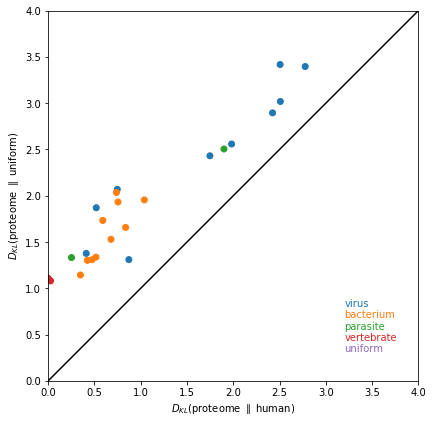

In [59]:
lim = 4.0
ys = df.loc[names]['DKL_rand']
xs = df.loc[names]['DKL']
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(xs, ys, color=typecolors)
ax.plot([0, lim], [0, lim], 'k-')
ax.set_xlabel('$D_{KL}$(proteome $\parallel$ human)')
ax.set_ylabel('$D_{KL}$(proteome $\parallel$ uniform)')
ax.set_aspect('equal')
ax.set_xlim(-0.0, lim)
ax.set_ylim(-0.0, lim)
for i, (type_, color) in enumerate(type_to_color.items()):
    ax.text(0.8, 0.2-i*0.03, type_, color=color, transform=ax.transAxes)
fig.tight_layout()